{% include toc title="This Week" icon="file-text" %}





<div class="notice--info" markdown="1">

## <i class="fa fa-ship" aria-hidden="true"></i> Welcome to Week {{ page.week }}!

Welcome to week {{ page.week }} of Earth Analytics! This week, you will dive deeper into working with spatial data in `Python`. You will learn how to handle data in different coordinate reference systems, how to create custom maps and legends and how to extract data from a raster file. You are on your way towards integrating many different
types of data into your analysis which involves knowing how to deal with things
like coordinate reference systems and varying data structures.

## <i class="fa fa-check-square-o fa-2" aria-hidden="true"></i> What You Need

You will need a computer with internet access to complete this lesson and the
`spatial-vector-lidar` data subset created for the course. Note that the data download below is large (172MB)
however it contains data that you will use for the next 2 weeks! 
The best way to get the data is to use earthpy:

`et.data.get_data("spatial-vector-lidar")`

You can also download the data using the link below. 

{% include/data_subsets/course_earth_analytics/_data-spatial-lidar.md %}


</div>


### 1. Complete the Assignment Below

<div class="notice--warning" markdown="1">

## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Homework 

### The Homework Assignment for This Week Can Be Found on Github 

<a href="https://github.com/earthlab-education/ea-python-2020-03-spatial-vector-template" target="_blank">Click here to view the GitHub Repo with the assignment template. </a>

The lessons for this week have been moved to our <a href="https://www.earthdatascience.org/courses/use-data-open-source-python/">Intermediate Earth Analytics Textbook. </a>

Please read the following chapters to support completing this week's assignment:
* <a href="https://www.earthdatascience.org/courses/use-data-open-source-python/intro-vector-data-python/">Chapters 2-3 - Introduction to vector data- spatial data in open source python </a>

</div>


# original rubric for safe keeping  - -hidden for now

## .html Report Structure & Code: 20%

| Full Credit | No Credit  |
|:----|----|
| .ipynb file submitted  |   |   |
| Code is written using "clean" code practices following the Python PEP 8 style guide |  |  |
| First markdown cell contains a title, author and date  | |
| All cells contain code that run   |  |
| All required `Python` packages are listed at the top of the document in a code chunk. |     |


## PLOT: Map of Madera County with Roads 40%

| Full Credit | No Credit  |
|:----|----|
| Roads, plot locations & AOI boundary are included on the map  |   |   |
| Road lines are symbolized by type |  |  |
| Plot location points are symbolized by type | |
| Plots has a title that clearly defines plot contents   |  |
| Plots have a 2-3 sentence caption that clearly describes plot contents |     |
| Plot legend is next to the map (on the side or below) and doesn't overlay the plot contents |     |
| Plot legend is formatted with the correctly symbology that matches the map and is easy to read |     |

## PLOT: Map of Madera County with Roads 30%

| Full Credit | No Credit  |
|:----|----|
| Road length for each county is correct  |   |   |
-->

In [1]:
import os
import earthpy as et
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import box
from matplotlib.colors import ListedColormap, BoundaryNorm
import seaborn as sns

# Get data and set wd
data = et.data.get_data('spatial-vector-lidar')
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

# Set plot styles
sns.set(font_scale=1.5)
sns.set_style("white")


In [2]:
sjer_aoi = gpd.read_file(
    'data/spatial-vector-lidar/california/neon-sjer-site/vector_data/SJER_crop.shp')
sjer_roads = gpd.read_file(
    'data/spatial-vector-lidar/california/madera-county-roads/tl_2013_06039_roads.shp')
sjer_plots = gpd.read_file(
    'data/spatial-vector-lidar/california/neon-sjer-site/vector_data/SJER_plot_centroids.shp')

# replace missing roads with "Unknown"
sjer_roads["RTTYP"] = sjer_roads["RTTYP"].fillna("Unknown")

# reproject roads data
sjer_roads = sjer_roads.to_crs(sjer_aoi.crs)

## Plot 1 - Roads Map and Legend

## Plot 1 - Roads Map and Legend

Create a map of California roads:

1. Import the `madera-county-roads/tl_2013_06039_roads.shp` layer located in your `spatial-vector-lidar` data download.
2. Create a map that shows the madera roads layer, sjer plot locations and the `sjer_aoi` boundary (`sjer_crop.shp`).
3. Plot the roads so different **road types** (using the RTTYP field) are represented using unique symbology. Use the `RTTYP` field to plot unique road types.
4. Map the plot locations by the attribute **plot type** using unique symbology for each "type".
4. Add a **title** to your plot.
5. Adjust your plot legend so that the full name for each `RTTYP` name is clearly represented in your legend. HINT: You will need to consult the metadata for that layer to determine what each `RTTYP` type represents.
6. Be sure that your plot legend is not covering your data.

**IMPORTANT:** be sure that all of the data are within the same `EXTENT` and `crs` of the `sjer_aoi` layer. This means that you may have to crop and reproject your data prior to plotting it!

In [3]:
# # Create function to clip point data using geopandas


# def clip_points(shp, clip_obj):
#     '''
#     Docs Here
#     '''

#     poly = clip_obj.geometry.unary_union
#     return(shp[shp.geometry.intersects(poly)])

# # Create function to clip line and polygon data using geopandas


# def clip_line_poly(shp, clip_obj):
#     '''
#     docs
#     '''

#     # Create a single polygon object for clipping
#     poly = clip_obj.geometry.unary_union
#     spatial_index = shp.sindex

#     # Create a box for the initial intersection
#     bbox = poly.bounds
#     # Get a list of id's for each road line that overlaps the bounding box and subset the data to just those lines
#     sidx = list(spatial_index.intersection(bbox))
#     #shp_sub = shp[shp.index.isin(sidx)]
#     shp_sub = shp.iloc[sidx]

#     # Clip the data - with these data
#     clipped = shp_sub.copy()
#     clipped['geometry'] = shp_sub.intersection(poly)

#     # Return the clipped layer with no null geometry values
#     return(clipped[clipped.geometry.notnull()])


# # Final clip function that handles points, lines and polygons


# def clip_shp(shp, clip_obj):
#     '''
#     '''
#     if shp["geometry"].iloc[0].type == "Point":
#         return(clip_points(shp, clip_obj))
#     else:
#         return(clip_line_poly(shp, clip_obj))

In [4]:
# box(*sjer_aoi.total_bounds)
# sjer_roads["geometry"] = sjer_roads.geometry.intersection(box(*sjer_aoi.total_bounds))
# # Crop the roads data & retail only the rows that have valid geometry
# sjer_roads["geometry"] = sjer_roads.geometry.intersection(box(*sjer_aoi.total_bounds))
# sjer_roads_cl = sjer_roads[sjer_roads.geometry.notnull()]

# clip the data
sjer_roads_cl = gpd.clip(sjer_roads, sjer_aoi)

# Remove empty geometry
sjer_roads_cl = sjer_roads_cl[~sjer_roads_cl.is_empty]

/home/nathan/miniconda3/envs/earth-analytics-python/lib/python3.7/site-packages/geopandas/geoseries.py:358: UserWarning: GeoSeries.notna() previously returned False for both missing (None) and empty geometries. Now, it only returns False for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use '~s.is_empty & s.notna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.notna', UserWarning)
  return self.notna()


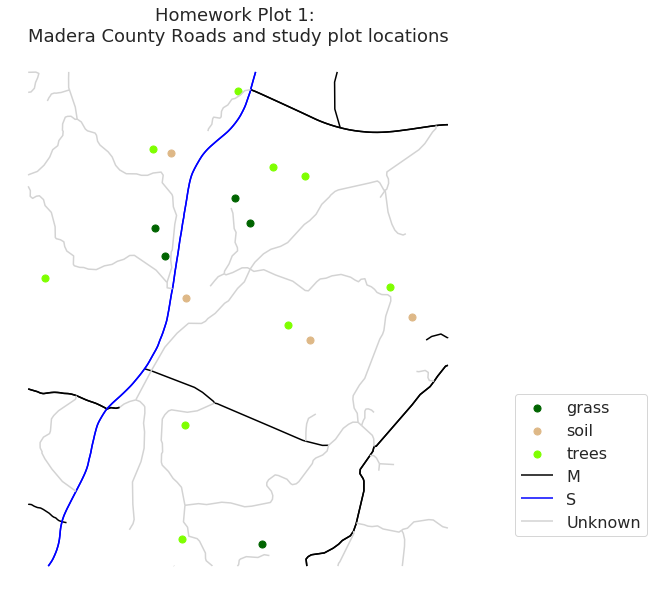

In [5]:
# create color dictionaries for points and lines
roadPalette = {'M': 'black', 'S': 'blue', 'C': 'grey', 'Unknown': 'lightgrey'}
pointsPalette = {'trees': 'chartreuse',
                 'grass': 'darkgreen', 'soil': 'burlywood'}

# plot data
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_axis_off()

# add the plot points
for ctype, data in sjer_plots.groupby('plot_type'):
    color = pointsPalette[ctype]
    label = ctype
    data.plot(color=color, ax=ax, label=label, markersize=50)

# add roads
for ctype, data in sjer_roads_cl.groupby('RTTYP'):
    color = roadPalette[ctype]
    label = ctype
    data.plot(color=color, ax=ax, label=label)

# add title
ax.set(title='Homework Plot 1: \nMadera County Roads and study plot locations')

# ensure the legend is outside of the plot
ax.legend(loc=(1.1, .1), fontsize=16, frameon=True)

# # set up and render legend
# points = ax.collections[:3]
# lines = ax.collections[3:]
# leg1 = ax.legend(points, [point.get_label() for point in points], loc=(1.1, .1),
#                  prop={'size': 16},
#                  frameon=False,
#                  title='Plot Type')

# leg2 = ax.legend(lines, [line.get_label() for line in lines],
#                  loc=(1.1, .3),
#                  prop={'size': 16},
#                  frameon=False,
#                  title='Road Type')
# ax.add_artist(leg1)
# plt.setp(leg2.get_title(), fontsize='15')
# plt.setp(leg1.get_title(), fontsize='15')
plt.show()

## Calculate Total Length of Road Siskiyou, Modoc, Del Norte County in California

Create a geopandas `data.frame` that shows the total length of road in each county in the state of California.
To calculate this use the following layers:

* Counties in California: `spatial-vector-lidar/california/ca_counties/CA_Counties_TIGER2016.shp` layer 
* Roads: `spatial-vector-lidar/global/ne_10m_roads/ne_10m_roads.shp` layer 

IMPORTANT: before performing this calculation, REPROJECT both data layers to albers `.to_crs({'init': 'epsg:5070'})`
Tips

* Both layers need to the in the SAME coordinate reference system for you to work with them together. 
* You will want to clip the roads to the boundary of California. The `unary_union` attribute will be useful for this clip operation!
* you may need to rename a column for this to work properly. You can use `dataframe.rename(columns = {'old-col-name':'new-col-name'}, inplace = True)` to rename a column in pandas. 
* To assign each road to it's respective county, you will need to do a spatial join using `.sjoin()`

* Finally calculate the length of each road segment. 

To calculate length of each line in your geodataframe , you can use the syntax `geopandas_dataframe_name.length`. Create a new column using the syntax:

`geopandas_dataframe_name["length"] = geopandas_dataframe_name.length`

* Summarize the data to calculate total length using pandas `.groupby()` on the county column name.

HINT: use: `pd.options.display.float_format = '{:.4f}'.format` if you'd like to turn off scientific notation for your outputs.


## Plot 2 - Roads in Del Norte, Modoc & Siskiyou Counties in California


In [6]:
## SOLUTION

ne_roads = gpd.read_file(
    'data/spatial-vector-lidar/global/ne_10m_roads/ne_10m_roads.shp')
ca_cty = gpd.read_file(
    'data/spatial-vector-lidar/california/CA_Counties/CA_Counties_TIGER2016.shp')

# Reproject & clip the data
ca_cty_albers = ca_cty.to_crs('epsg:5070')
ne_roads_albers = ne_roads.to_crs('epsg:5070')

three_counties = ca_cty_albers[ca_cty_albers['NAME'].isin(
    ["Siskiyou", "Modoc", "Del Norte"])]
ca_roads = gpd.clip(ne_roads_albers, three_counties)

# Spatial join - apply county to each road
roads_county = gpd.sjoin(ca_roads, three_counties,
                         how="inner", op='intersects')

pd.options.display.float_format = '{:.4f}'.format
# calculate the total length of road
roads_county["length"] = roads_county.length

# sum existing columns
final_answer = roads_county[["length", "NAME"]].groupby("NAME").sum()
#final_answer

/home/nathan/miniconda3/envs/earth-analytics-python/lib/python3.7/site-packages/geopandas/geoseries.py:358: UserWarning: GeoSeries.notna() previously returned False for both missing (None) and empty geometries. Now, it only returns False for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use '~s.is_empty & s.notna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.notna', UserWarning)
  return self.notna()


In [7]:
# my_buffered_lines = sjer_roads_cl.copy()
# #my_buffered_lines['geometry'] = road_cl.geometry.buffer(100, resolution=160)
# # Assumes that geometry will be the geometry column
# my_buffered_lines['geometry'] = my_buffered_lines.geometry.apply(lambda g: g.buffer(100, cap_style=2))
# my_buffered_lines = my_buffered_lines[my_buffered_lines.geometry.notnull()]

#my_buffered_lines.plot()

In [8]:
# leah's testing code
two_counties = ca_cty_albers[ca_cty_albers['NAME'].isin(
    ["Humboldt", "Trinity"])]

poly = two_counties
roads = ne_roads_albers.copy()

# spatial subset
bbox = poly.unary_union.bounds
# Get a list of id's for each road line that overlaps the bounding box and subset the data to just those lines
spatial_index = roads.sindex
sidx = list(spatial_index.intersection(bbox))
shp_sub = roads.iloc[sidx]

road_cl = shp_sub.copy()

for i, row in enumerate(poly.iterrows()):
    road_cl["geometry"] = shp_sub.intersection(
        poly["geometry"].iloc[[i]].unary_union)
    # Concat df's
    if i == 0:
        all_clipped = road_cl.copy()
    else:
        all_clipped = pd.concat([all_clipped, road_cl[road_cl.geometry.notnull()]])
     
# fig, ax = plt.subplots()
# all_clipped.plot(ax=ax)
# two_counties.plot(ax=ax, facecolor="none",
#                     edgecolor="black")


/home/nathan/miniconda3/envs/earth-analytics-python/lib/python3.7/site-packages/geopandas/geoseries.py:358: UserWarning: GeoSeries.notna() previously returned False for both missing (None) and empty geometries. Now, it only returns False for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use '~s.is_empty & s.notna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.notna', UserWarning)
  return self.notna()


Using the dataframe that you created above with each road assigned to the county that it is within, create a map of roads by county. Color the roads in each county using a unique color.

Below is a map of the road layers clipped to the three counties to help you check your answer!
HINT: use the `legend=True` argument in `.plot()` to create a legend.

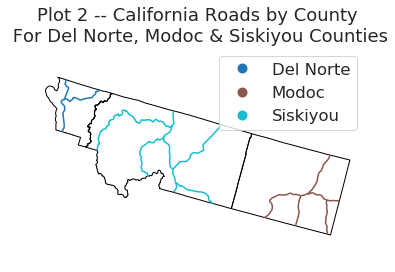

In [9]:
# This will test them doing a spatial join and a clip
fig, ax = plt.subplots()
three_counties.plot(ax=ax,
                    facecolor="none",
                    edgecolor="black")
roads_county.plot(ax=ax, column="NAME", legend=True)
ax.set_title(
    "Plot 2 -- California Roads by County\n For Del Norte, Modoc & Siskiyou Counties")
ax.set_axis_off()
plt.axis('equal')
plt.show()

In [10]:
# Test looping through each geom
two_counties = ca_cty_albers[ca_cty_albers['NAME'].isin(
    ["Humboldt", "Trinity"])]
#[county for county in two_counties["geometry"]]
#two_counties["geometry"].iloc[0]

#cl.clip_shp(ca_roads,two_counties["geometry"].iloc[[0]] )
#ca_roads.intersection(two_counties["geometry"].iloc[0] )
#two_counties["geometry"].iloc[[0]].unary_union
#two_counties.iloc[[0]]

# for ii in zip(two_counties.iloc[[1]]):
#     print(ii)

In [11]:
# Testing with a county where the roads overlap counties

two_counties = ca_cty_albers[ca_cty_albers['NAME'].isin(
    ["Humboldt", "Trinity"])]
#ca_roads = cl.clip_shp(ne_roads_albers, two_counties)

clip = ca_roads.intersection(two_counties)
# Spatial join - apply county to each road
roads_county2 = gpd.sjoin(ca_roads, two_counties,
                         how="inner", op='intersects')

pd.options.display.float_format = '{:.4f}'.format
# calculate the total length of road
roads_county["length"] = roads_county.length

# This till test them doing a spatial join and a clip
# fig, ax = plt.subplots()
# two_counties.plot(ax=ax,
#                     facecolor="none",
#                     edgecolor="black")
# roads_county2.plot(ax=ax, column="NAME", legend=True)
# ax.set_title("Plot 2 -- California Roads by County\n For Del Norte, Modoc & Siskiyou Counties")
# ax.set_axis_off()
# plt.axis('equal')
# plt.show()

In [12]:
pd.options.display.float_format = '{:.4f}'.format
# calculate the total length of road
roads_county["length"] = roads_county.length

# sum existing columns
final_answer = roads_county[["length", "NAME"]].groupby("NAME").sum()
#final_answer

In [13]:
#import autograde as t
#fig, ax = t.convert_single_axes_plot(plt)
# xy_coords = [val for l in ax.lines for val in l.get_xydata()] #.plot()
# xy_coords

## Plot 3 - Quantile Map for The USA


The 2014 census layer: `"data/spatial-vector-lidar/usa/usa-states-census-2014.shp"` contains an `ALAND` and `AWATER` attribute columns that represent calculated total land and water area for each state in the continental United States. Use this layer to summarize the data by `region`. Then provide a table that shows summary values for each attribute 

Use this layer to calculate mean values for `ALAND` and `AWATER` found in the attributes.

In [14]:
# This will test them building a figure with two plots - they've asked about this a lot
state_boundary_us = gpd.read_file(
    "data/spatial-vector-lidar/usa/usa-states-census-2014.shp")
state_boundary_us = state_boundary_us[[
    'region', 'geometry', 'ALAND', 'AWATER']]
mean_region_val = state_boundary_us.dissolve(by="region", aggfunc='sum')

# just to ensure this doesn't render on the page!
# fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
# mean_region_val.plot(column='ALAND',
#                      legend=True,
#                      ax=ax1)
# mean_region_val.plot(column='AWATER',
#                      legend=True,
#                      ax=ax2)
# ax1.set_axis_off()
# ax2.set_axis_off()
# plt.suptitle('Plot 3a and b Census Data - Total (Sum) Land and Water by Region', fontsize=16)
# plt.show()

In [15]:
# Print out the table
#mean_region_val



1. Download the natural earth data using the code below. Be sure to add the download packate to the TOP of your notebook. It is just here as an example to highlight that you will need to use this package to download the data.

After you have downloaded the data, import the data and 
1. subset the data to include the following columns: `["REGION_WB", "CONTINENT", "POP_RANK","POP_EST", 'geometry']`
2. Dissolve the data by region (`REGION_WB`) column and aggregate by sum and mean. HINT: you can provide the aggfun= argument with a [list] of functions in quotes and it will summarize numeric columns using each function
3. Create two plots within one matplotlib figure 
    a. Create a plot of the sum estimated population (`POP_EST`) by region
    b. Create a plot of the mean population range (`POP_RANK`) by region

## Plot 3 - Census Data

You can use the code below to download and unzip the data from the Natural Earth website.
Please note that the download function was written to take

1. a download path - this is the directory where you want to store your data
2. a url - this is the URL where the data are located. The URL below might look odd as it has two "http" strings in it but it is how the url's are organized on natural earth and should work. 

The `download()` function will unzip your data for you and place it in the directory that you specify. 

In [16]:
# Add this line importing the download package to your top cell with the other packages!
#from download import download

# Get the data from natural earth
url = "https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/10m/cultural/ne_10m_admin_0_countries.zip"

# Please note that this is the directory name where your data will be unzipped
download_path = os.path.join("data", "earthpy-downloads", "ne_10m_admin_0_countries")

et.data.get_data(url=url)
country_path = os.path.join(download_path, "ne_10m_admin_0_countries.shp")

In [17]:
countries = gpd.read_file(country_path)
countries_cols = countries[["REGION_WB", "CONTINENT", "POP_RANK","POP_EST", 'geometry']]
mean_region_val = countries_cols.dissolve(by="REGION_WB", aggfunc=["sum","mean"])


/home/nathan/miniconda3/envs/earth-analytics-python/lib/python3.7/site-packages/pandas/core/reshape/merge.py:618: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


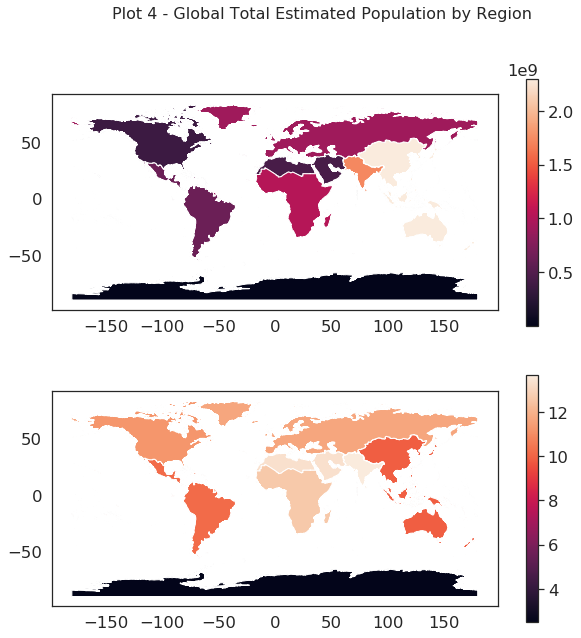

In [18]:
# Final plot of data
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
mean_region_val.plot(column=mean_region_val.columns[3],
                     legend=True,
                     ax=ax1)
mean_region_val.plot(column=mean_region_val.columns[2],
                     legend=True,
                     ax=ax2)

plt.suptitle(
    'Plot 4 - Global Total Estimated Population by Region', fontsize=16)
plt.show()
